In [1]:
import os
import datetime
import math
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import ewtpy

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split

In [2]:
# DATA
df1 = pd.read_csv('data_day.csv')
df2 = pd.read_csv('data_2018-08-05_2021-04-30.csv')
df3 = pd.read_csv('data_2018-05-05_2018-08-04.csv')
df4 = pd.read_csv('data_2015-08-09_2018-05-04.csv')
df5 = pd.read_csv('data_2013-02-12_2015-08-08.csv')
df6 = pd.read_csv('data_2010-05-19_to_2013-02-11.csv')
df7 = pd.read_csv('data_2007-08-23_to_2010-05-18.csv')
df8 = pd.read_csv('data_2004-11-26_to_2007-08-22.csv')
df = pd.concat([df6, df5, df4, df3, df2, df1])
df.index = range(0,4996)
df.tail()

date_time = pd.concat([pd.to_datetime(df['datetime'][0:4000]),pd.to_datetime(df['datetime'][4000:])])
data_use = df[['temp','tempmax', 'tempmin','humidity', 'precip', 'windspeed', 'solarradiation', 'solarenergy']]
print(data_use)

      temp  tempmax  tempmin  humidity  precip  windspeed  solarradiation  \
0     30.8     36.5     26.0      78.1   0.000       20.5           301.4   
1     31.3     36.4     27.0      76.0   0.300       24.1           281.5   
2     30.7     39.0     26.0      76.1   2.300       40.7           237.1   
3     31.5     39.6     26.0      71.2   0.800       15.1           296.8   
4     27.6     30.8     25.8      80.1  33.000       22.7           240.8   
...    ...      ...      ...       ...     ...        ...             ...   
4991  20.5     22.0     19.5      93.8   8.794       17.5           148.7   
4992  22.4     26.5     20.0      84.5   0.683       19.4           140.8   
4993  22.6     26.6     20.0      85.5   0.072       20.3           131.9   
4994  23.0     26.0     19.0      82.4   3.300       20.5            63.7   
4995  16.0     18.0     14.0      91.4   3.400       22.3            15.8   

      solarenergy  
0            26.1  
1            24.3  
2            20

In [3]:
timestamp_s = date_time.map(pd.Timestamp.timestamp)
timestamp_s[1] - timestamp_s[0]

86400.0

C:\Users\tridu\AppData\Local\Temp\ipykernel_10820\1206436225.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_use['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
C:\Users\tridu\AppData\Local\Temp\ipykernel_10820\1206436225.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_use['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))


Index(['temp', 'tempmax', 'tempmin', 'humidity', 'precip', 'windspeed',
       'solarradiation', 'solarenergy', 'Year sin', 'Year cos'],
      dtype='object')

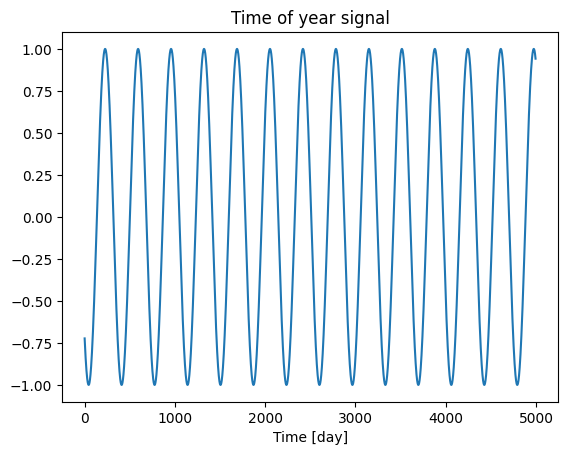

In [4]:
# PERIOD TIME

day = 24*60*60
year = (365.2425)*day
# df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
# df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
data_use['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
data_use['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

# plt.plot(np.array(df['Year sin'])[:366])
plt.plot(np.array(data_use['Year cos'])[:])
plt.xlabel('Time [day]')
plt.title('Time of year signal')
data_use.columns

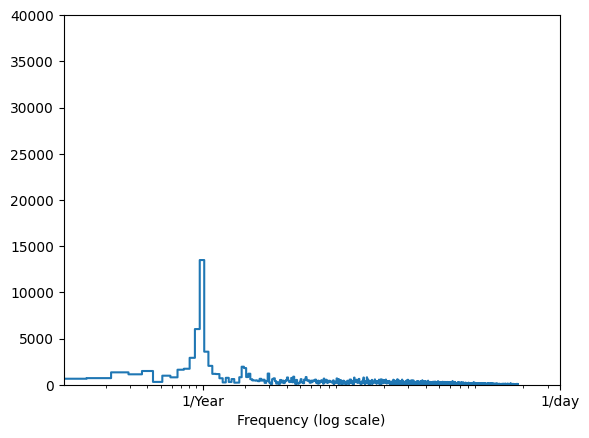

In [5]:
fft = tf.signal.rfft(data_use['temp'])
f_per_dataset = np.arange(0, len(fft))

n_samples_day = len(data_use['humidity'])
days_per_year = 365.2524
years_per_dataset = n_samples_day/(days_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 40000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')

In [6]:
def decompose_to_ewt(data):
    temp_data,  mfb ,boundaries = ewtpy.EWT1D(data, N = 8)
    return temp_data, mfb, boundaries
def split_mode(ewt):
    modes = [[],[],[],[],[]]
    for i in range(8):
        modes[i] = [m for m in ewt[:,i]]
    return modes

(4996, 8)


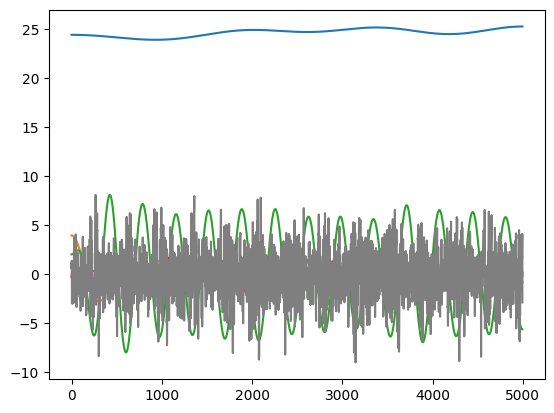

In [7]:
temp_ewt,_,_ = decompose_to_ewt(data_use['temp'])
plt.plot(temp_ewt)
print(temp_ewt.shape) 

In [8]:
temp_ewt_transpose = np.transpose(temp_ewt)
for i in range(8):
    data_use['temp_ewt'+str(i)] = temp_ewt_transpose[i]

C:\Users\tridu\AppData\Local\Temp\ipykernel_10820\1592067542.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_use['temp_ewt'+str(i)] = temp_ewt_transpose[i]
C:\Users\tridu\AppData\Local\Temp\ipykernel_10820\1592067542.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_use['temp_ewt'+str(i)] = temp_ewt_transpose[i]
C:\Users\tridu\AppData\Local\Temp\ipykernel_10820\1592067542.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

In [9]:
data_use.columns

Index(['temp', 'tempmax', 'tempmin', 'humidity', 'precip', 'windspeed',
       'solarradiation', 'solarenergy', 'Year sin', 'Year cos', 'temp_ewt0',
       'temp_ewt1', 'temp_ewt2', 'temp_ewt3', 'temp_ewt4', 'temp_ewt5',
       'temp_ewt6', 'temp_ewt7'],
      dtype='object')

In [10]:
# number_train = int(data_use.shape[0] * 0.8)
# train, test = data_use[0:number_train], data_use[number_train:]

In [10]:
def create_data(in_steps, out_steps, data, features):
    X = []
    y = []
    for i in range(len(data)-in_steps-out_steps):
        X.append(data[i:i+in_steps])
        y.append(data[i+in_steps:i+in_steps+out_steps][features])
    return np.array(X), np.array(y)
def normalize(data, train_mean, train_std):
    data_norm = (data - train_mean)/train_std
    return data_norm
def unnormalize(data, train_mean, train_std):
    data_unnorm = (data * train_std) + train_mean
    return data_unnorm


In [11]:
in_steps = 365
out_steps = 7
features_train = ['temp']
num_features = len(features_train) 

In [12]:
data_window = create_data(in_steps, out_steps, data_use, features_train)

In [13]:
print(data_window[0].shape)
print(data_window[1].shape)

(4624, 365, 18)
(4624, 7, 1)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(data_window[0], data_window[1], test_size=0.2, random_state=42)

In [32]:
print(X_train)

[[[ 1.84000000e+01  2.00000000e+01  1.66000000e+01 ...  5.20519037e-01
    8.27410473e-02 -5.65538598e-01]
  [ 1.70000000e+01  2.00000000e+01  1.50000000e+01 ...  5.15775585e-01
    8.70453545e-02 -1.79355539e+00]
  [ 1.56000000e+01  1.73000000e+01  1.40000000e+01 ...  5.10158797e-01
    9.11690833e-02 -3.08605168e+00]
  ...
  [ 1.73000000e+01  1.83000000e+01  1.60000000e+01 ... -4.16502188e-01
   -8.15452472e-02 -2.24912315e+00]
  [ 1.81000000e+01  2.10000000e+01  1.61000000e+01 ... -4.26922540e-01
   -8.08818098e-02 -1.33074830e+00]
  [ 1.85000000e+01  2.31000000e+01  1.41000000e+01 ... -4.36586760e-01
   -8.00576338e-02 -7.84328798e-01]]

 [[ 3.08000000e+01  3.40000000e+01  2.80000000e+01 ... -1.62797464e-01
   -2.55547231e-01  7.83465066e-01]
  [ 2.79000000e+01  3.00000000e+01  2.60000000e+01 ... -1.70082396e-01
   -2.44042059e-01 -2.14371824e+00]
  [ 2.70000000e+01  2.90000000e+01  2.58000000e+01 ... -1.77060905e-01
   -2.31988801e-01 -3.01301257e+00]
  ...
  [ 2.98000000e+01  3.3

In [15]:
X_train_norm = normalize(X_train, X_train.mean(), X_train.std())
y_train_norm = normalize(y_train, y_train.mean(), y_train.std())
X_test_norm = normalize(X_test, X_train.mean(), X_train.std())
y_test_norm = normalize(y_test, y_train.mean(), y_train.std())

In [29]:
print(X_train_norm)

[[[-0.08187455 -0.04715219 -0.1209372  ... -0.46988568 -0.47938611
   -0.49345473]
  [-0.11225661 -0.04715219 -0.15565957 ... -0.46998862 -0.4792927
   -0.52010451]
  [-0.14263868 -0.10574617 -0.17736104 ... -0.47011051 -0.4792032
   -0.54815359]
  ...
  [-0.10574617 -0.08404469 -0.13395809 ... -0.49022042 -0.48295136
   -0.529991  ]
  [-0.08838499 -0.02545071 -0.13178794 ... -0.49044656 -0.48293696
   -0.51006091]
  [-0.0797044   0.02012239 -0.17519089 ... -0.49065629 -0.48291908
   -0.4982028 ]]

 [[ 0.18722376  0.25666848  0.12645962 ... -0.48471465 -0.48672746
   -0.46417936]
  [ 0.12428948  0.16986258  0.08305667 ... -0.48487275 -0.48647778
   -0.52770356]
  [ 0.10475815  0.1481611   0.07871638 ... -0.48502419 -0.48621621
   -0.54656853]
  ...
  [ 0.16552228  0.24147745  0.10475815 ... -0.47990645 -0.48489289
   -0.46609127]
  [ 0.16552228  0.21977597  0.10475815 ... -0.47975863 -0.48530411
   -0.46642964]
  [ 0.14165066  0.19156405  0.10475815 ... -0.47961368 -0.48570601
   -0.49

In [40]:
# X_train, y_train = create_data(in_steps, out_steps, train, features_train)
# y_train = y_train.reshape(y_train.shape[0], y_train.shape[1], num_features)

# X_test, y_test = create_data(in_steps, out_steps, test, features_train)
# y_test = y_test.reshape(y_test.shape[0], y_test.shape[1], num_features)

# X_train_norm = normalize(X_train, X_train.mean(), X_train.std())
# y_train_norm = normalize(y_train, y_train.mean(), y_train.std())

# X_test_norm = normalize(X_test, X_train.mean(), X_train.std())
# y_test_norm = normalize(y_test, y_train.mean(), y_train.std())

# print(X_train_norm.shape, y_train_norm.shape, X_test_norm.shape, y_test_norm.shape)


(3624, 365, 18) (3624, 7, 1) (628, 365, 18) (628, 7, 1)


In [22]:
CONV_WIDTH = 365
def lamda_layer(x):
    return x[:, -CONV_WIDTH:, :]
model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
    tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    # Shape => [batch, 1, conv_units]
    tf.keras.layers.Conv1D(64, activation='relu', kernel_size=(CONV_WIDTH)),
    # Shape => [batch, 1,  out_steps*features]
    tf.keras.layers.Dense(out_steps*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([out_steps, num_features])
])





In [23]:
model.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Lion(learning_rate = 0.001),
)

In [24]:
history = model.fit(X_train_norm, y_train_norm, epochs=200, validation_split=0.2, batch_size=32, validation_batch_size=32)

Epoch 1/200
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.7546 - val_loss: 0.3095
Epoch 2/200
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.3227 - val_loss: 0.2368
Epoch 3/200
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.2460 - val_loss: 0.2579
Epoch 4/200
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.2352 - val_loss: 0.2267
Epoch 5/200
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.2233 - val_loss: 0.2300
Epoch 6/200
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.2101 - val_loss: 0.2296
Epoch 7/200
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.1978 - val_loss: 0.2146
Epoch 8/200
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1851 - val_loss: 0.2477
Epoch 9/200
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.1890 - val_loss: 0.2234
Epoch 10/200
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1715 - val_loss: 0.2086
Epoch 11/200
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.1718 - val_loss: 0.2395
Epoch 12/200
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step

In [45]:
model.save('lstm365-ewt-7-temp-nott-random-ngons.keras')

In [46]:
model_recall = tf.keras.models.load_model('lstm365-ewt-7-temp-nott-random-ngons.keras')

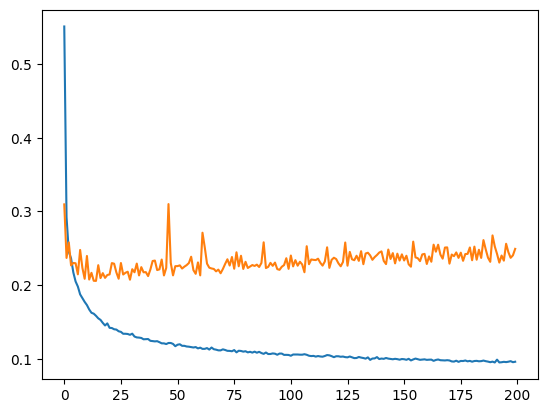

In [25]:
plt.plot(history.history['loss'][:])
plt.plot(history.history['val_loss'][:])

In [48]:
print(model_recall.evaluate(X_test_norm, y_test_norm))
print(model.evaluate(X_test_norm, y_test_norm))

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 0.0151
0.015460855327546597
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.0151
0.015460855327546597


In [130]:
predict = model_recall.predict(X_test_norm)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Day:  1
MAE:  1.1522139913198113
MSE:  2.181216299277314
CORR:  0.9592922636786515
Day:  2
MAE:  1.6469406134115683
MSE:  4.474605501392334
CORR:  0.9207060370804276
Day:  3
MAE:  1.8484046123607736
MSE:  5.5717074501401305
CORR:  0.9005581927762625
Day:  4
MAE:  1.887264224078204
MSE:  5.668909242499259
CORR:  0.8975795944026761
Day:  5
MAE:  1.8240682263760954
MSE:  5.482151435179396
CORR:  0.8988317960031621
Day:  6
MAE:  1.8844609962669578
MSE:  5.606872375507
CORR:  0.896603897171232
Day:  7
MAE:  1.8986790810662348
MSE:  5.756032040996164
CORR:  0.895210331268213


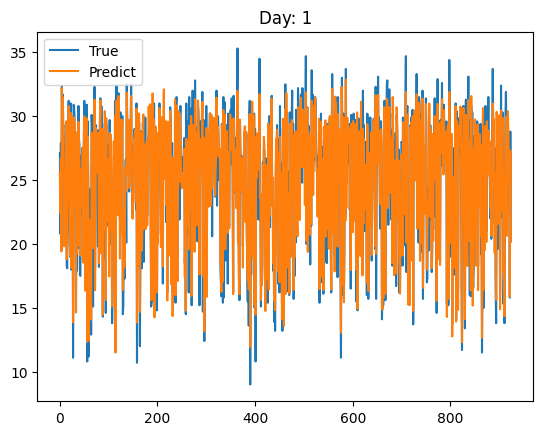

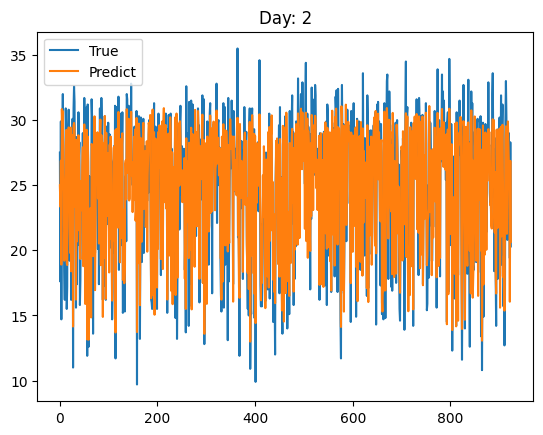

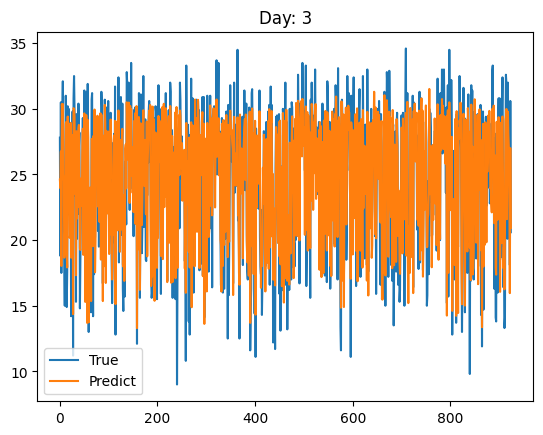

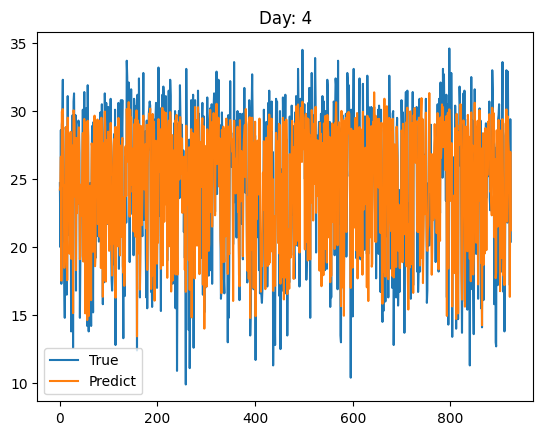

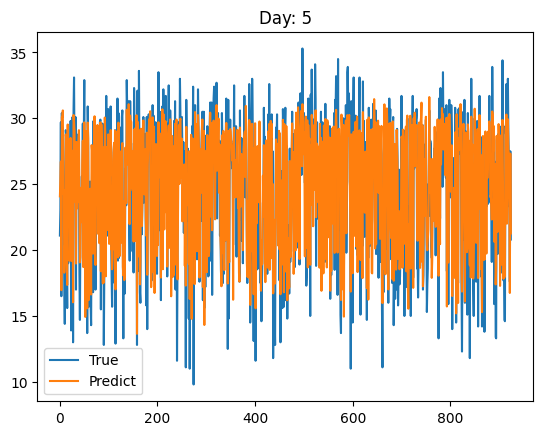

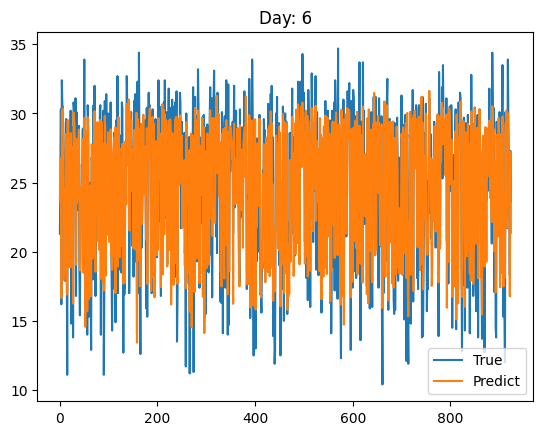

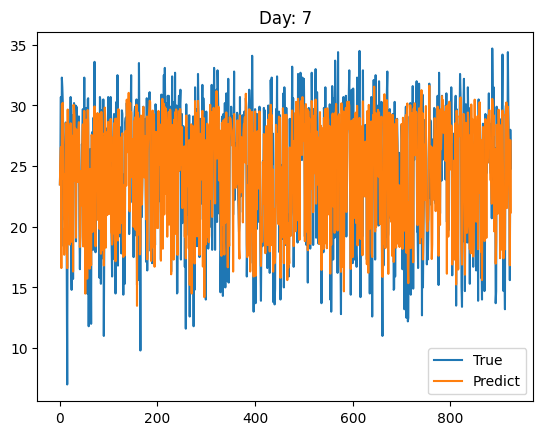

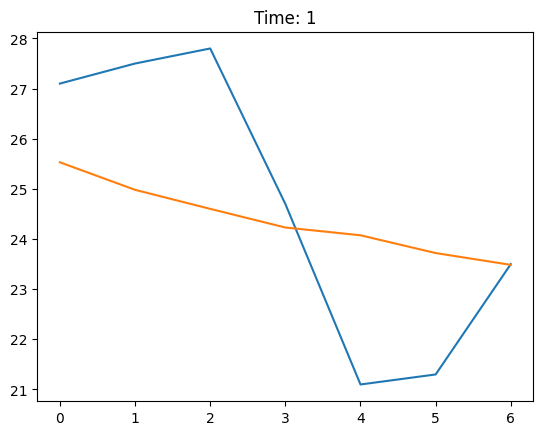

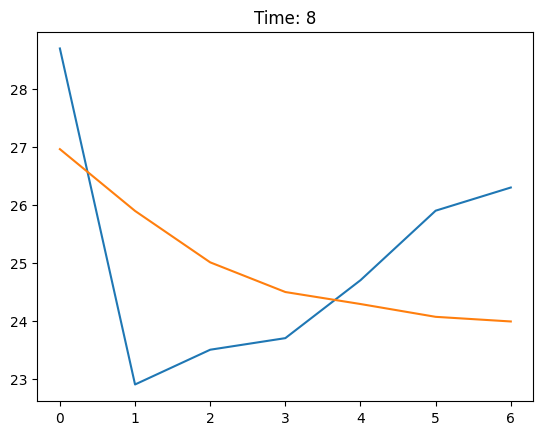

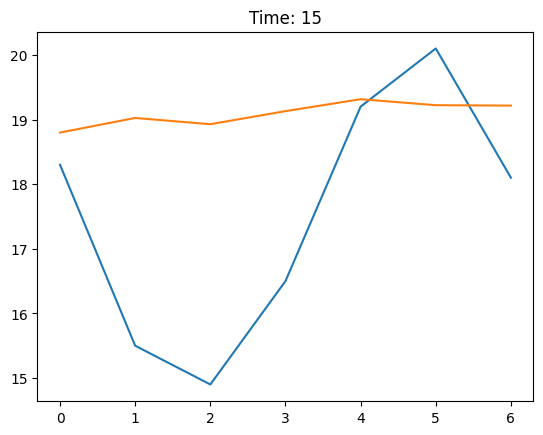

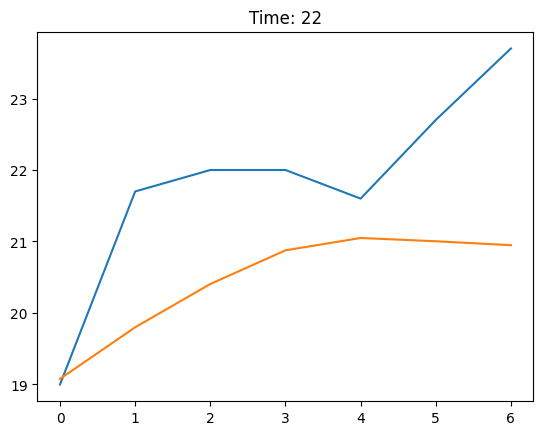

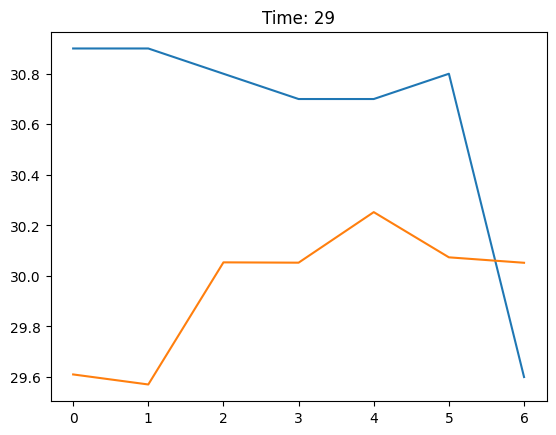

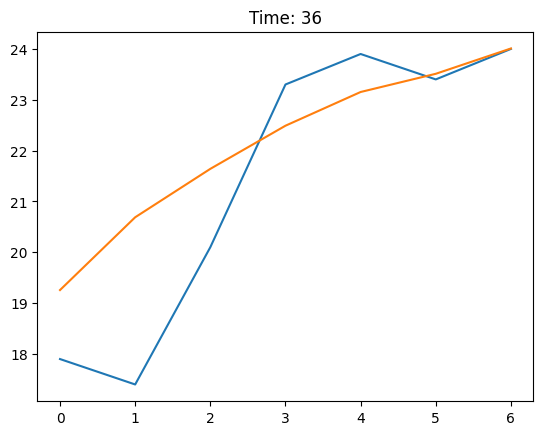

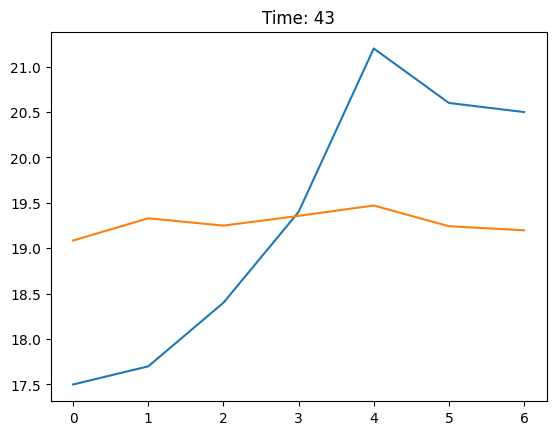

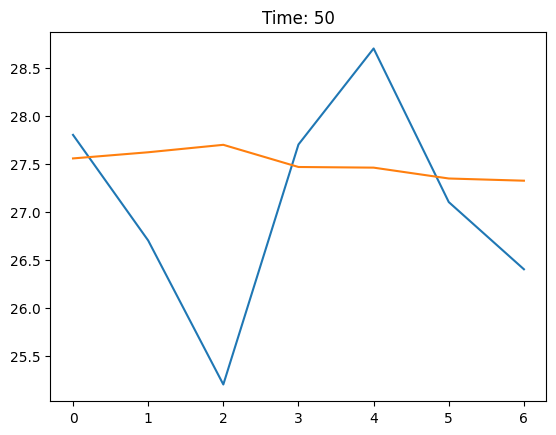

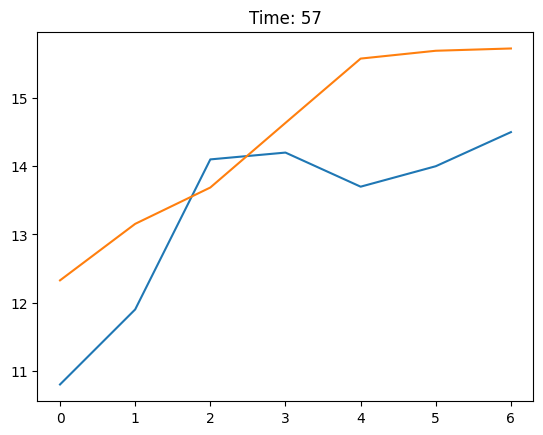

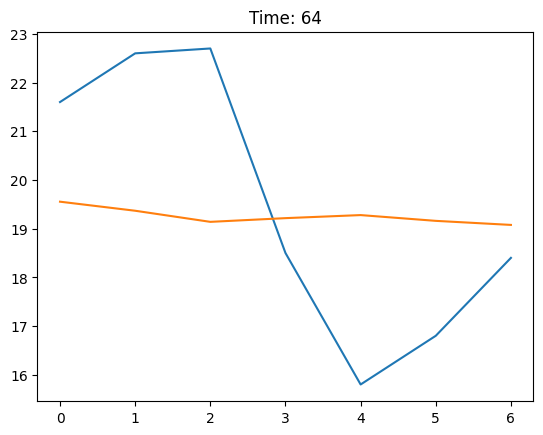

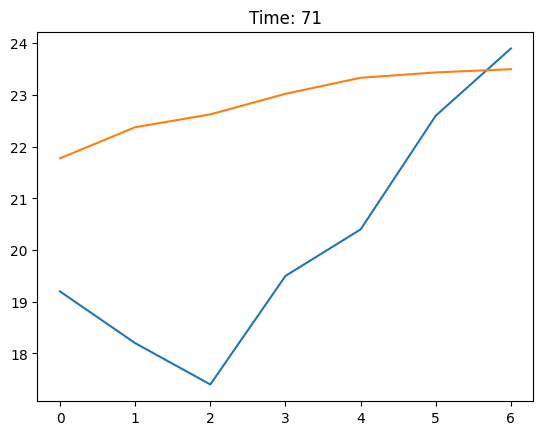

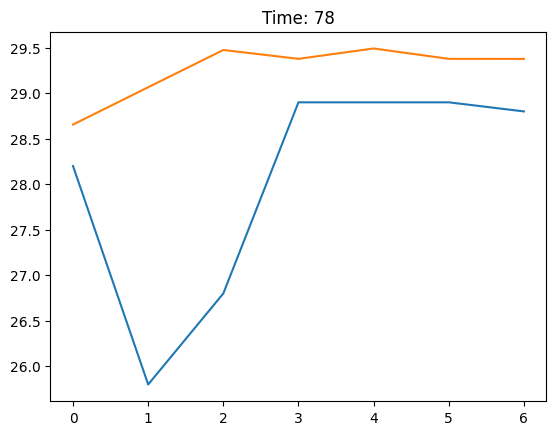

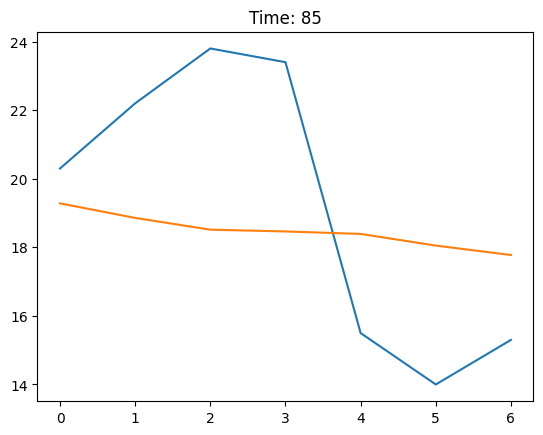

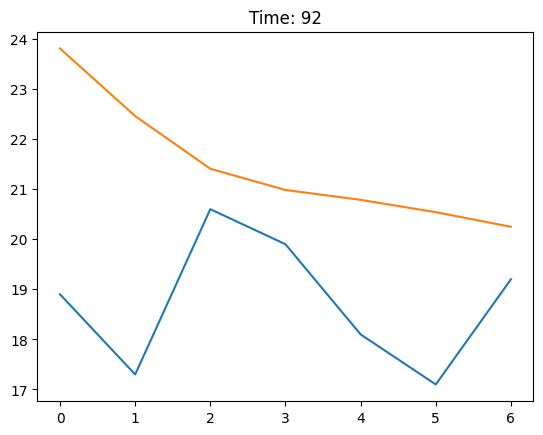

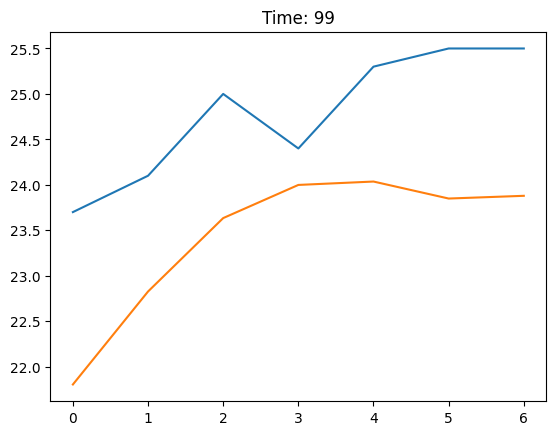

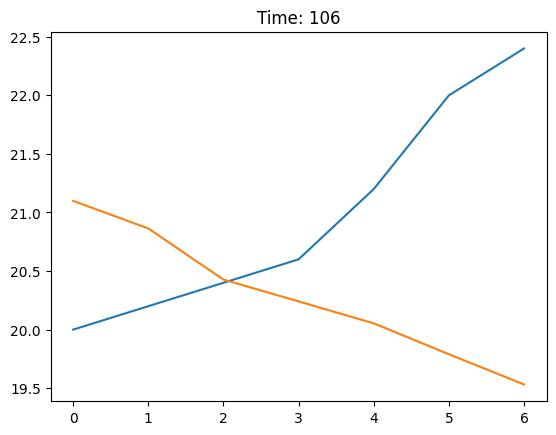

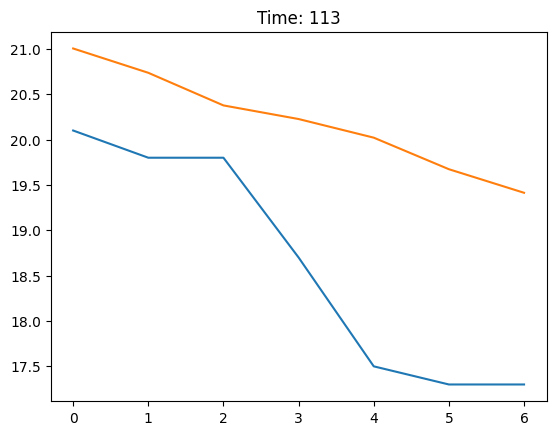

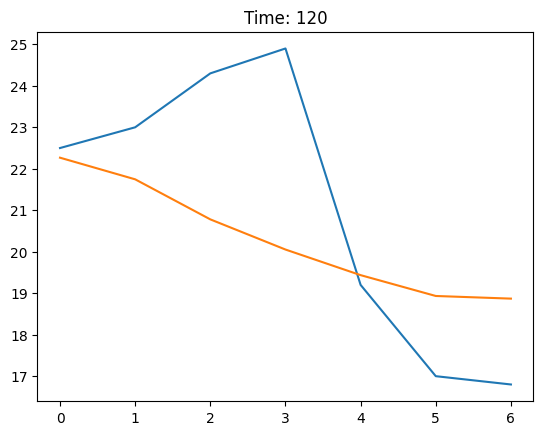

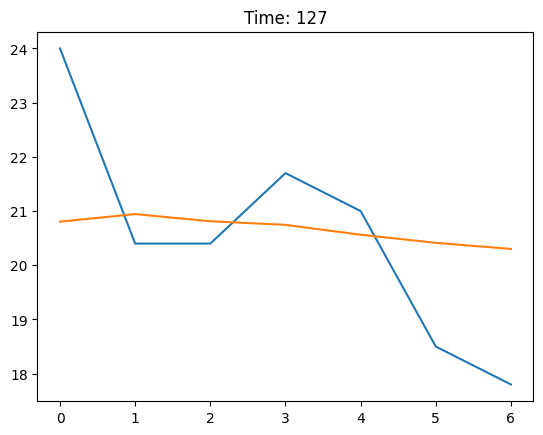

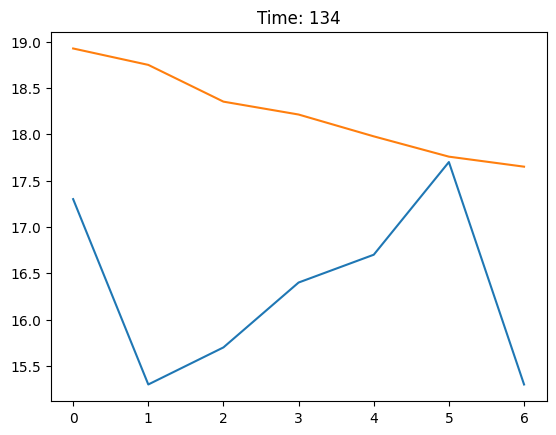

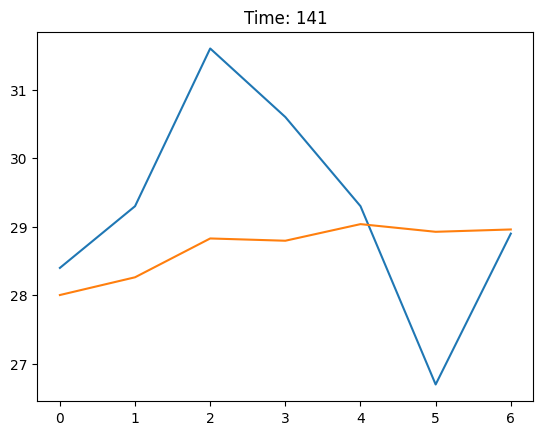

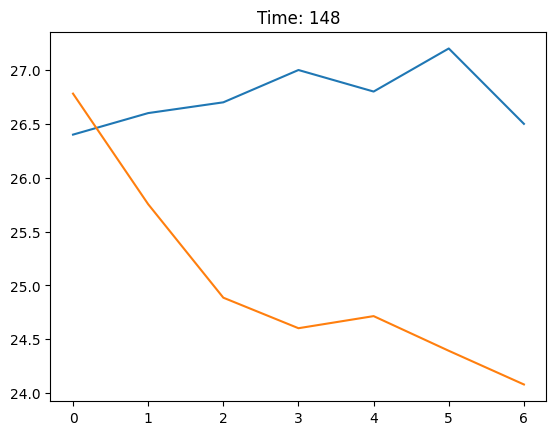

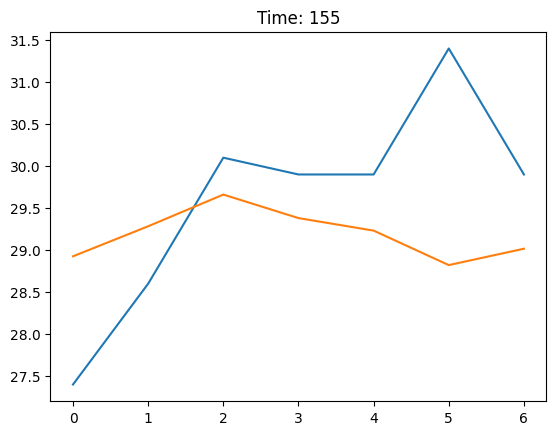

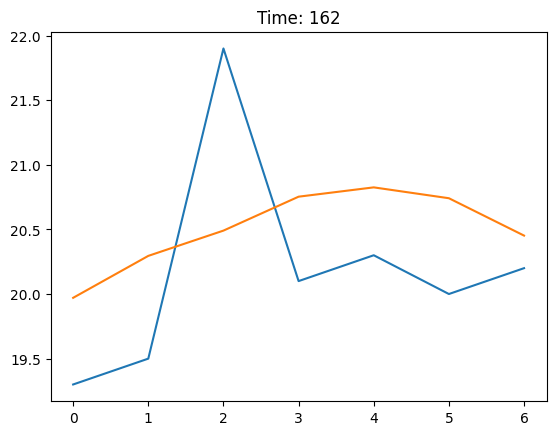

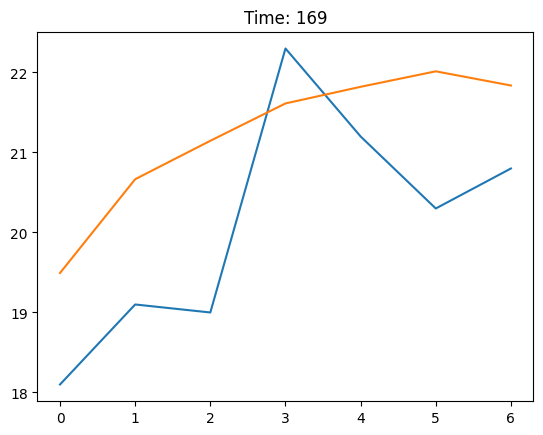

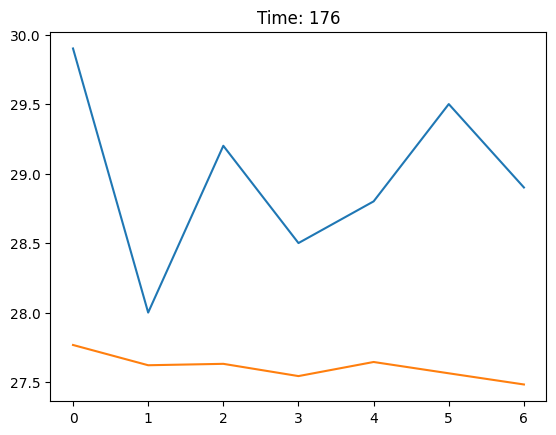

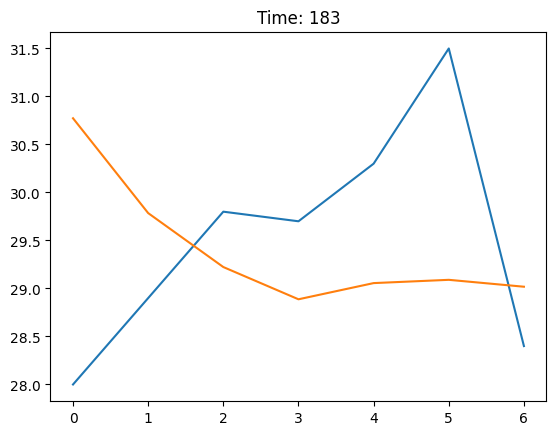

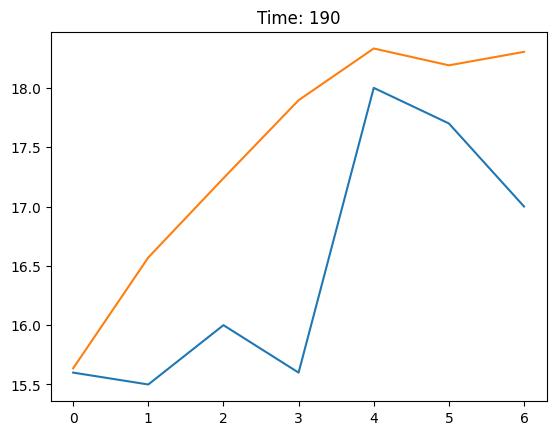

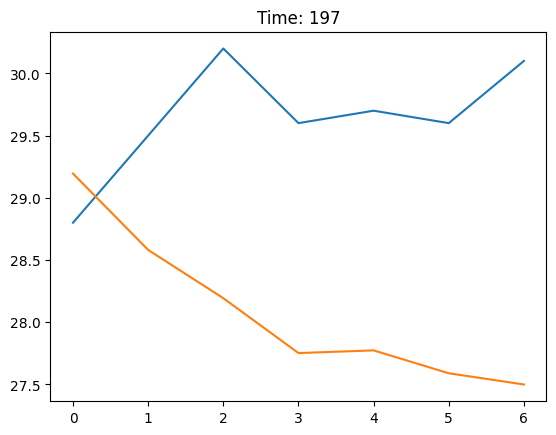

In [21]:
predict = model.predict(X_test_norm)
feature = 0
predict_unnorm = unnormalize(predict, y_train.mean(), y_train.std())
y_test_unnorm = unnormalize(y_test_norm, y_train.mean(), y_train.std())
for i in range(out_steps):
    print('Day: ', i+1)
    print('MAE: ', mean_absolute_error(y_test_unnorm[:,i,feature], predict_unnorm[:,i,feature]))
    print('MSE: ', mean_squared_error(y_test_unnorm[:,i,feature], predict_unnorm[:,i,feature]))
    print('CORR: ', np.corrcoef(y_test_unnorm[:,i,feature], predict_unnorm[:,i,feature])[0,1])
for i in range(out_steps):
    plt.title('Day: ' + str(i+1))
    plt.plot(y_test_unnorm[:,i,feature])
    plt.plot(predict_unnorm[:,i,feature])
    plt.legend(['True', 'Predict'])
    plt.show()
for i in range(0, 200, out_steps):
    plt.title('Time: ' + str(i+1))
    plt.plot(y_test_unnorm[i,:,feature])
    plt.plot(predict_unnorm[i,:,feature])
    plt.show()
    

In [60]:
predict = model.predict(X_test_norm)
predict_unnorm = unnormalize(predict, y_train.mean(), y_train.std())
y_test_unnorm = unnormalize(y_test_norm, y_train.mean(), y_train.std())
for i in range(14):
    print('Day: ', i+1)
    print('MAE: ', mean_absolute_error(y_test_unnorm[:,i,0], predict_unnorm[:,i,0]))
    print('MSE: ', mean_squared_error(y_test_unnorm[:,i,0], predict_unnorm[:,i,0]))
    print('CORR: ', np.corrcoef(y_test_unnorm[:,i,0], predict_unnorm[:,i,0])[0,1])
for i in range(14):
    plt.title('Day: ' + str(i+1))
    plt.plot(y_test_unnorm[:,i,0])
    plt.plot(predict_unnorm[:,i,0])
    plt.legend(['True', 'Predict'])
    plt.show()
for i in range(0, 200, 14):
    plt.title('Time: ' + str(i+1))
    plt.plot(y_test_unnorm[i,:,0])
    plt.plot(predict_unnorm[i,:,0])
    plt.show()

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
Day:  1
MAE:  1.1991872546680742
MSE:  2.5220922238475607
CORR:  0.9499375918640894
Day:  2
MAE:  1.662975104913891
MSE:  4.555002420485512
CORR:  0.9082385045910583
Day:  3
MAE:  1.8576092152896513
MSE:  5.602050655492296
CORR:  0.8860264549154626
Day:  4
MAE:  1.9549582414848858
MSE:  6.024363672611226
CORR:  0.8774668261243131
Day:  5
MAE:  2.0106116352947314
MSE:  6.342143321448441
CORR:  0.8706946207310629
Day:  6
MAE:  2.067119338372485
MSE:  6.7229986836824365
CORR:  0.865046908003836
Day:  7
MAE:  2.07987946376188
MSE:  6.857402683923122
CORR:  0.8602580935393919
Day:  8


IndexError: index 7 is out of bounds for axis 1 with size 7